In [ ]:
!gdown --id 1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 25.0MB/s]


In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 34.6 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [ ]:
dataset = pd.read_csv("/content/Auto_MPG_data.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

In [ ]:
X_train = train_dataset.copy()
X_val = val_dataset.copy()

y_train = X_train.pop('MPG')
y_val = X_val.pop('MPG')

X_train, y_train = X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32)
X_val, y_val = X_val.to_numpy().astype(np.float32), y_val.to_numpy().astype(np.float32) 

In [ ]:
X_val.shape[0] == y_val.shape[0]

True

In [ ]:
_MEAN = X_train.mean(axis=0)
_STD = X_train.std(axis=0)

X_train = ( X_train-_MEAN)/_STD
X_val = ( X_val-_MEAN)/_STD

In [ ]:
######################### YOUR CODE HERE #########################
# Sử dụng tf.keras.Sequential để thiết kế model theo yêu cầu đề  bài 
linear_model = tf.keras.Sequential(
    # Dense layer: 1 node, input shape = 9
)
linear_model.add(tf.keras.Input(shape=(9,)))
linear_model.add(tf.keras.layers.Dense(1))
##################################################################

opt = tf.optimizers.SGD(learning_rate=0.1)
linear_model.compile(optimizer=opt, loss='mse',
                     metrics=[tfa.metrics.RSquare(), tf.keras.metrics.MeanAbsoluteError()])

linear_history = linear_model.fit( X_train, y_train, validation_data=(X_val, y_val) ,epochs=100)

Epoch 1/100
10/10 [==============================] - 3s 57ms/step - loss: 174.8569 - r_square: -1.9367 - mean_absolute_error: 10.6829 - val_loss: 18.3989 - val_r_square: 0.7183 - val_mean_absolute_error: 3.2208
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 14.8316 - r_square: 0.7509 - mean_absolute_error: 2.8350 - val_loss: 11.6993 - val_r_square: 0.8209 - val_mean_absolute_error: 2.5177
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 12.5773 - r_square: 0.7888 - mean_absolute_error: 2.6827 - val_loss: 11.3850 - val_r_square: 0.8257 - val_mean_absolute_error: 2.4029
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 12.1985 - r_square: 0.7951 - mean_absolute_error: 2.6657 - val_loss: 11.9029 - val_r_square: 0.8177 - val_mean_absolute_error: 2.4175
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 12.0640 - r_square: 0.7974 - mean_absolute_error: 2.5886 - val_loss: 13.5120 - val_r_square: 0.

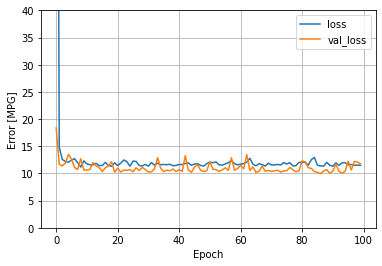

In [ ]:
plt.plot(linear_history.history['loss'], label='loss')
plt.plot(linear_history.history['val_loss'], label='val_loss')
plt.ylim([0, 40])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(linear_history.history)
hist['epoch'] = linear_history.epoch
hist.head(10)

,loss,r_square,mean_absolute_error,val_loss,val_r_square,val_mean_absolute_error,epoch
0,174.856857,-1.936703,10.682944,18.398945,0.718269,3.220845,0
1,14.831627,0.750904,2.835016,11.699347,0.820855,2.517656,1
2,12.577328,0.788765,2.682739,11.384992,0.825669,2.402938,2
3,12.198457,0.795128,2.665744,11.902936,0.817738,2.417501,3
4,12.064013,0.797386,2.588596,13.512049,0.793099,2.918595,4
5,12.466156,0.790632,2.640269,12.629231,0.806617,2.549901,5
6,12.715586,0.786442,2.691313,11.073655,0.830436,2.399679,6
7,11.954566,0.799224,2.634518,10.736112,0.835605,2.402701,7
8,11.181694,0.812205,2.567922,12.704966,0.805457,2.583090,8
9,12.311558,0.793229,2.618175,10.621916,0.837353,2.379334,9


In [ ]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MAE: ", min(hist['mean_absolute_error']))
print("Min val MAE: ", min(hist['val_mean_absolute_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  11.181694030761719
Min val loss:  9.966848373413086
Min MAE:  2.54076886177063
Min val MAE:  2.352797746658325
Max r-squared loss:  0.8122045993804932
Max val r-squared loss:  0.8473840951919556


In [ ]:
MLP_Regression_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=[9], activation="relu"),
    tf.keras.layers.Dense(units=64,  activation="relu"),
    tf.keras.layers.Dense(units=1)
])

MLP_Regression_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_opt = tf.keras.optimizers.SGD(learning_rate=0.01)
MLP_Regression_model.compile(optimizer=mlp_opt, loss='mse',
                             metrics=[tfa.metrics.RSquare(), tf.keras.metrics.MeanAbsoluteError()])

MLP_Regression_History = MLP_Regression_model.fit(X_train, y_train,
                                                  validation_data=(X_val, y_val), 
                                                  epochs=100, verbose=2)

Epoch 1/100
10/10 - 1s - loss: 248.9539 - r_square: -3.1812e+00 - mean_absolute_error: 12.7623 - val_loss: 119.5564 - val_r_square: -8.3069e-01 - val_mean_absolute_error: 8.6678 - 573ms/epoch - 57ms/step
Epoch 2/100
10/10 - 0s - loss: 157.1943 - r_square: -1.6401e+00 - mean_absolute_error: 9.5949 - val_loss: 44.3589 - val_r_square: 0.3208 - val_mean_absolute_error: 4.9903 - 61ms/epoch - 6ms/step
Epoch 3/100
10/10 - 0s - loss: 105.9147 - r_square: -7.7883e-01 - mean_absolute_error: 7.3802 - val_loss: 20.7075 - val_r_square: 0.6829 - val_mean_absolute_error: 3.2173 - 60ms/epoch - 6ms/step
Epoch 4/100
10/10 - 0s - loss: 33.3086 - r_square: 0.4406 - mean_absolute_error: 4.2371 - val_loss: 63.8032 - val_r_square: 0.0230 - val_mean_absolute_error: 6.2245 - 48ms/epoch - 5ms/step
Epoch 5/100
10/10 - 0s - loss: 25.1671 - r_square: 0.5773 - mean_absolute_error: 3.7508 - val_loss: 7.8278 - val_r_square: 0.8801 - val_mean_absolute_error: 1.9774 - 46ms/epoch - 5ms/step
Epoch 6/100
10/10 - 0s - loss

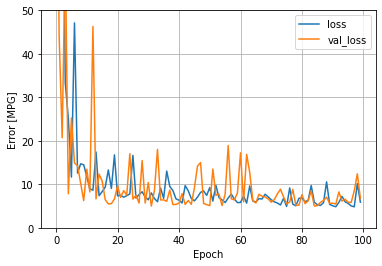

In [ ]:
plt.plot(MLP_Regression_History.history['loss'], label='loss')
plt.plot(MLP_Regression_History.history['val_loss'], label='val_loss')
plt.ylim([0, 50])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(MLP_Regression_History.history)
hist['epoch'] = MLP_Regression_History.epoch
hist.tail()

,loss,r_square,mean_absolute_error,val_loss,val_r_square,val_mean_absolute_error,epoch
95,5.609900,0.905782,1.640088,5.865454,0.910186,1.913246,95
96,5.033552,0.915462,1.589481,5.835946,0.910638,1.809627,96
97,4.819690,0.919054,1.507540,8.507636,0.869728,2.261419,97
98,10.161659,0.829336,2.107242,12.402264,0.810092,2.647775,98
99,5.883664,0.901184,1.729452,6.747004,0.896688,2.025432,99


In [ ]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MAE: ", min(hist['mean_absolute_error']))
print("Min val MAE: ", min(hist['val_mean_absolute_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  4.819689750671387
Min val loss:  4.999326705932617
Min MAE:  1.5075396299362183
Min val MAE:  1.6132855415344238
Max r-squared loss:  0.9190537929534912
Max val r-squared loss:  0.9234485626220703
